In [1]:
# TODO, show how different aggression configurations impact results
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from transpile_benchy.metrics.abc_metrics import MetricInterface
from transpile_benchy.metrics.gate_counts import DepthMetric
from mirror_gates.utilities import DoNothing
from mirror_gates.logging import transpile_benchy_logger

In [2]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/select.txt")
coupling_map = CouplingMap.from_heavy_hex(5)

In [3]:
total_work = 80
transpilers = [
    QiskitLevel3(coupling_map),
    Mirage(coupling_map, name="Mirage"),
    Mirage(
        coupling_map,
        name="Mirage-b2",
        layout_trials=3,
        fb_iters=total_work // 3,
        anneal_routing=True,
    ),
    Mirage(
        coupling_map,
        name="Mirage-b3",
        layout_trials=4,
        fb_iters=total_work // 4,
        anneal_routing=True,
    ),
]

metrics = [DepthMetric(consolidate=False)]

In [4]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=5,
    logger=transpile_benchy_logger,
)
benchmark.run()

INFO:transpile_benchy:Running benchmarks for circuits...


Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/4 [00:00<?, ?it/s]INFO:transpile_benchy:Running benchmark for circuit qft_n18


Loading qft_n18 from QASMBench


Circuits from library:  25%|██▌       | 1/4 [08:23<25:09, 503.08s/it]INFO:transpile_benchy:Running benchmark for circuit bigadder_n18


Loading bigadder_n18 from QASMBench


Circuits from library:  50%|█████     | 2/4 [14:12<13:45, 412.65s/it]INFO:transpile_benchy:Running benchmark for circuit qram_n20


Loading qram_n20 from QASMBench


Circuits from library:  75%|███████▌  | 3/4 [19:12<06:01, 361.09s/it]INFO:transpile_benchy:Running benchmark for circuit sat_n11


Loading sat_n11 from QASMBench


Circuits from library: 100%|██████████| 4/4 [27:45<00:00, 416.41s/it]


In [5]:
print(benchmark.summary_statistics(transpilers[0], transpilers[1])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[2])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[3])["monodromy_depth"])

{'average_change': -25.991284085112955, 'aggregrate_change': -25.022751522417046, 'best_circuit': 'qft_n18', 'worst_circuit': 'qram_n20'}
{'average_change': -17.223446030509887, 'aggregrate_change': -19.370326847389492, 'best_circuit': 'qft_n18', 'worst_circuit': 'qram_n20'}
{'average_change': -23.079847180805473, 'aggregrate_change': -23.865384264222392, 'best_circuit': 'qft_n18', 'worst_circuit': 'qram_n20'}


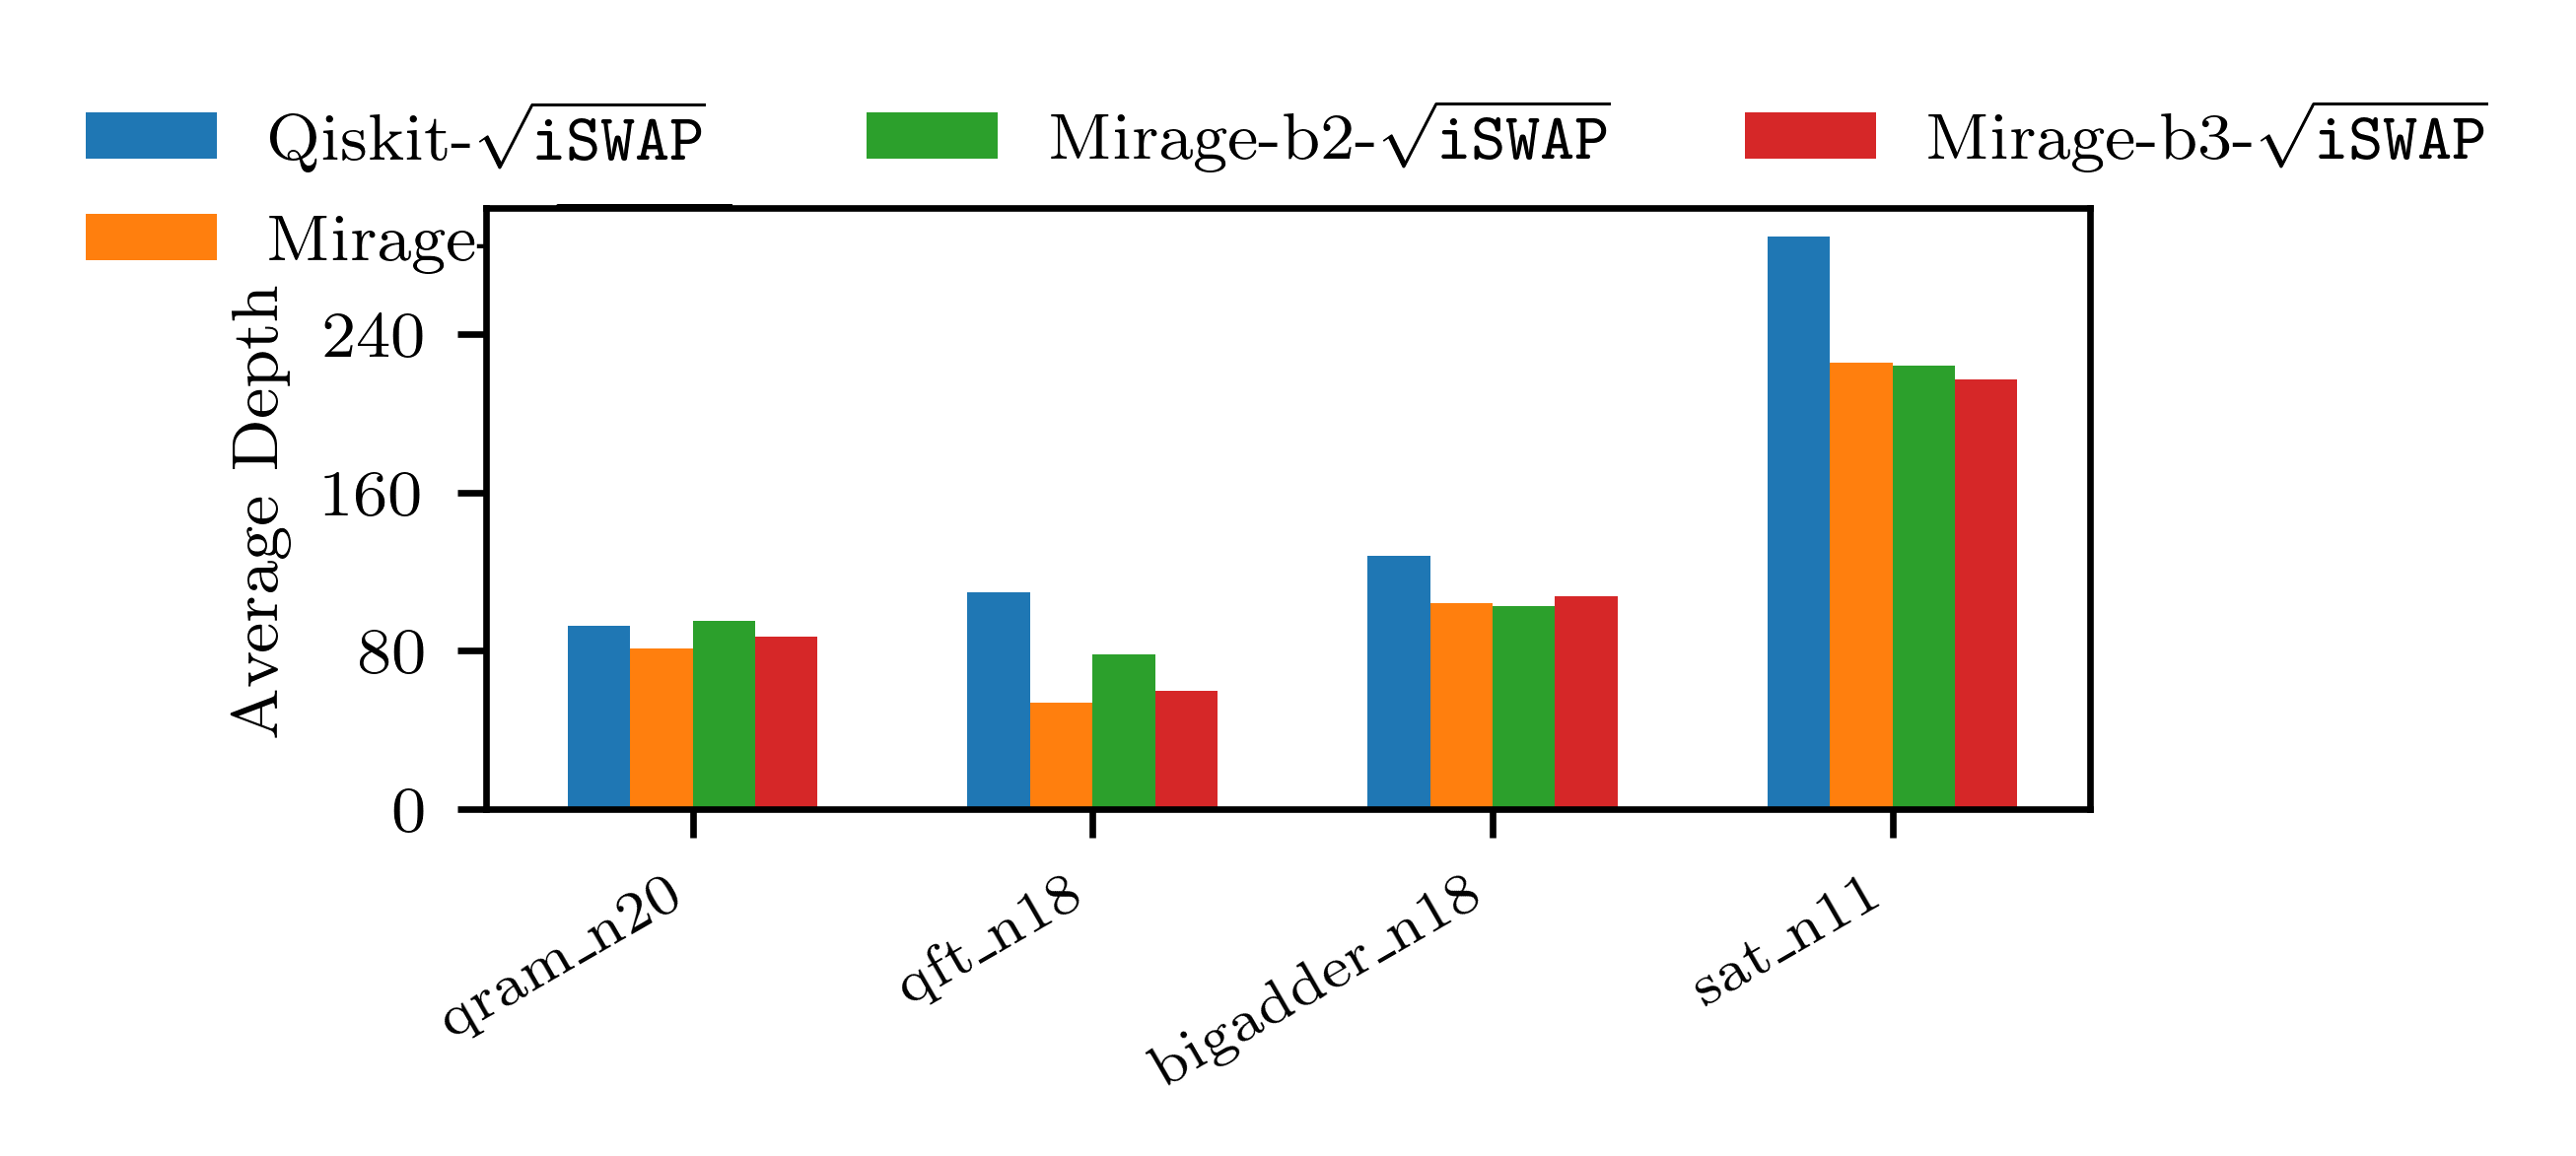

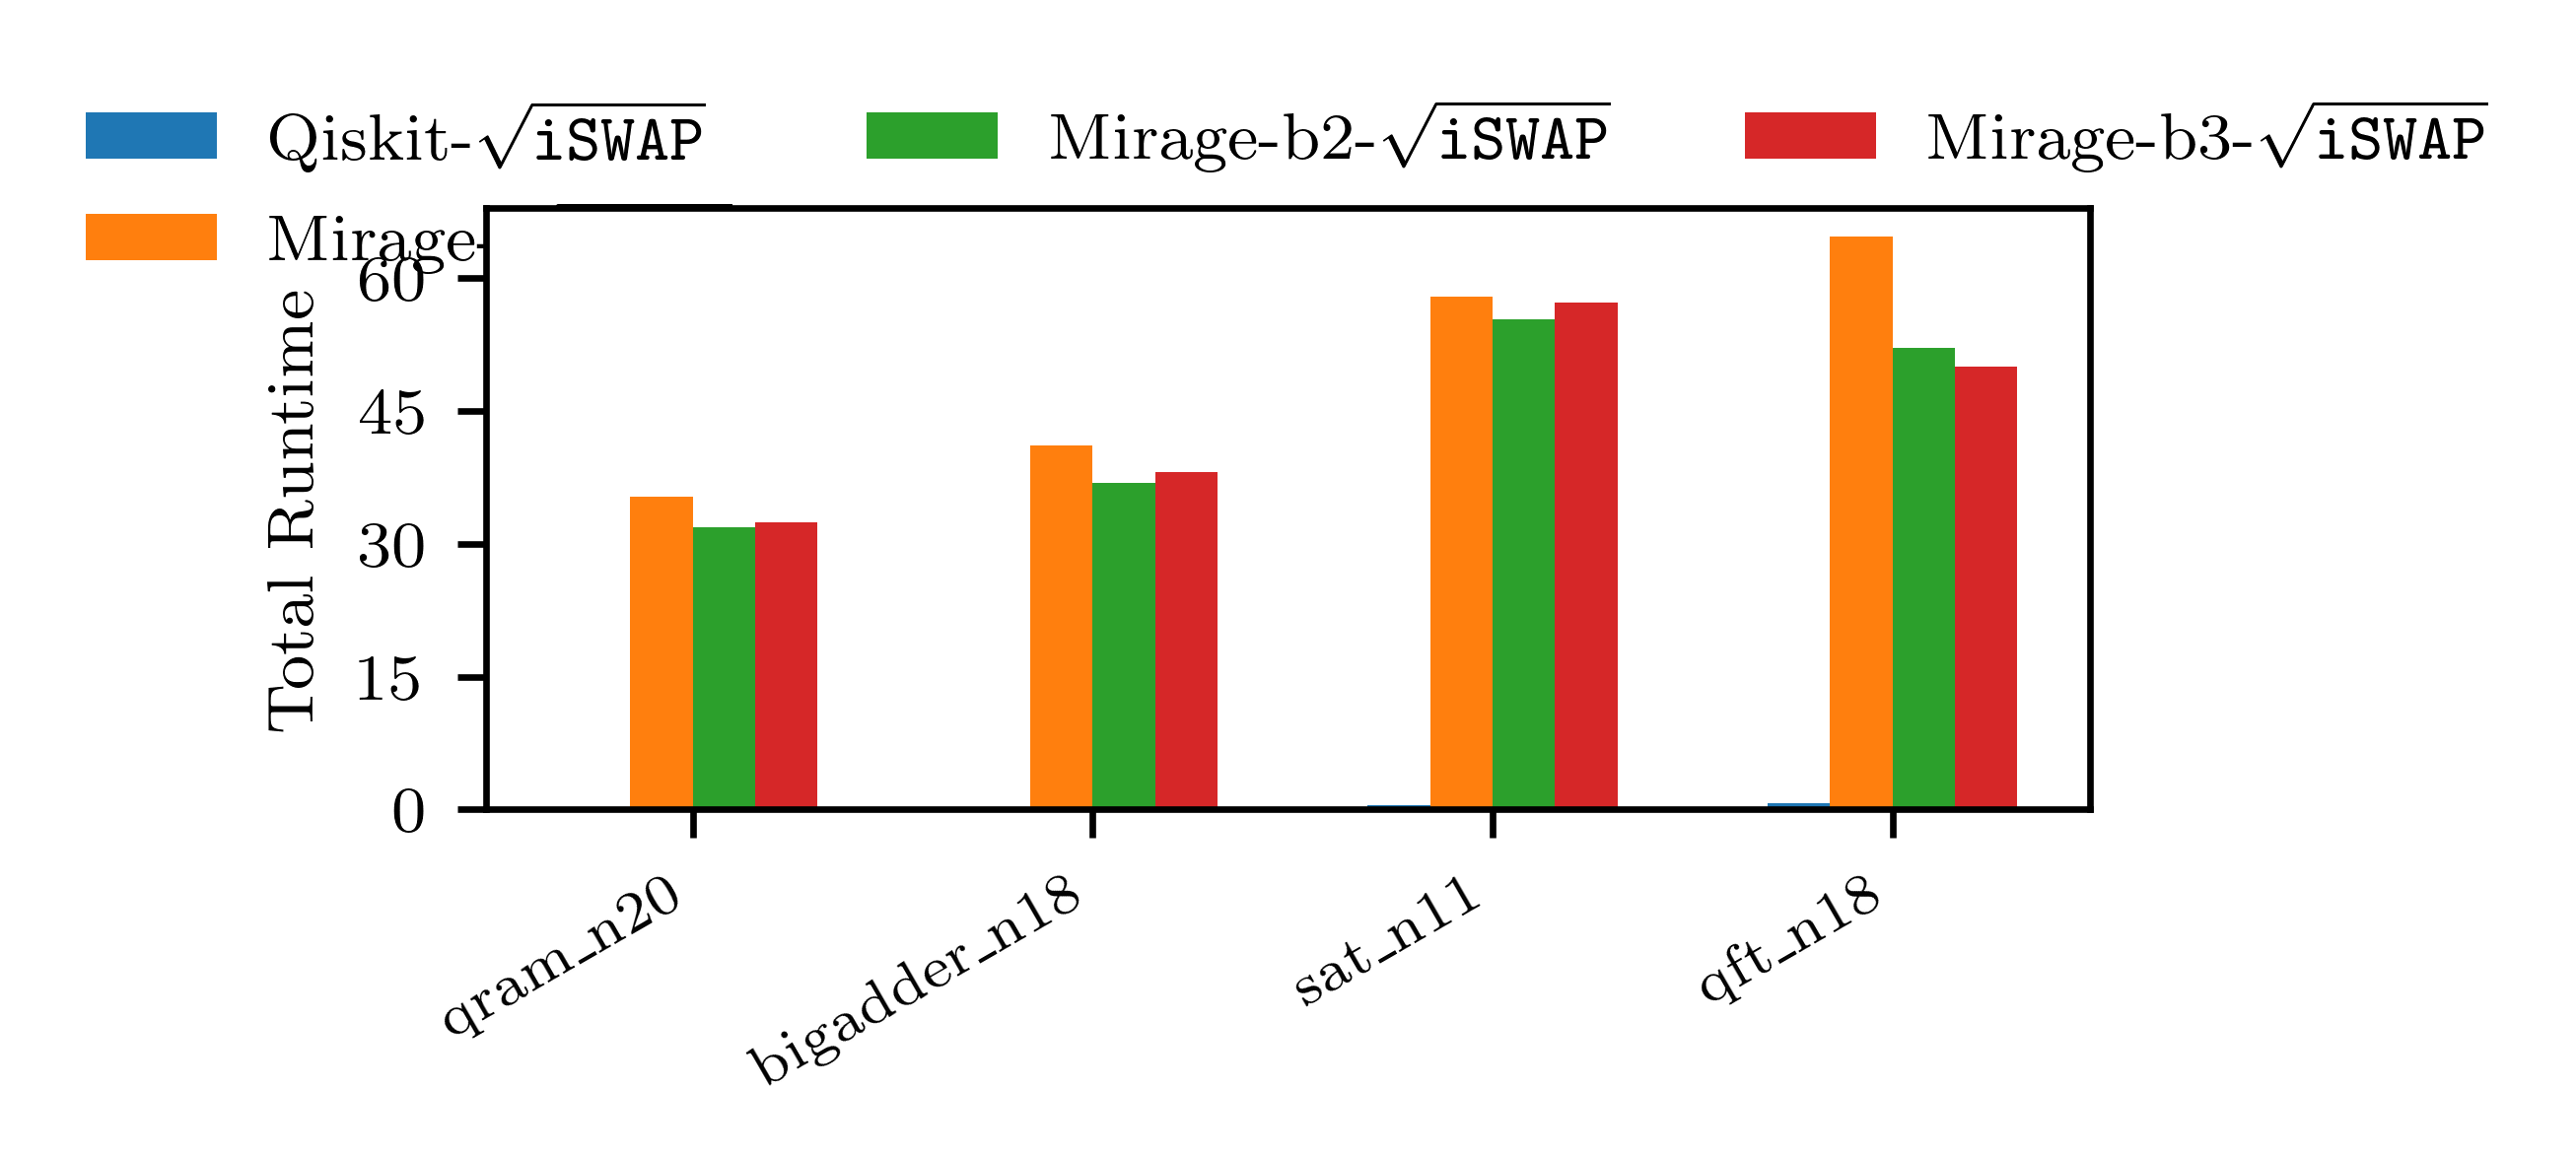

In [6]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="annealing")